In [34]:
import numpy as np
import pandas as pd
from sklearn import datasets, neighbors, metrics, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

%matplotlib inline

In [35]:
df = pd.read_csv('../data/trainingData.csv')
df.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [36]:
x = df[ ['Months since Last Donation', 'Number of Donations', 'Months since First Donation', 'Total Volume Donated (c.c.)'] ].values

# Target
y = df['Made Donation in March 2007']

seed = 8
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed)

<h3>Correlation Matrix</h3>

In [37]:
corrMatrix = df.corr()
corrMatrix

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
Unnamed: 0,1.000000,-0.023217,0.063148,0.063148,0.098370,0.041925
Months since Last Donation,-0.023217,1.000000,-0.159731,-0.159731,0.186899,-0.261234
Number of Donations,0.063148,-0.159731,1.000000,1.000000,0.622116,0.220615
Total Volume Donated (c.c.),0.063148,-0.159731,1.000000,1.000000,0.622116,0.220615
Months since First Donation,0.098370,0.186899,0.622116,0.622116,1.000000,-0.019819
Made Donation in March 2007,0.041925,-0.261234,0.220615,0.220615,-0.019819,1.000000


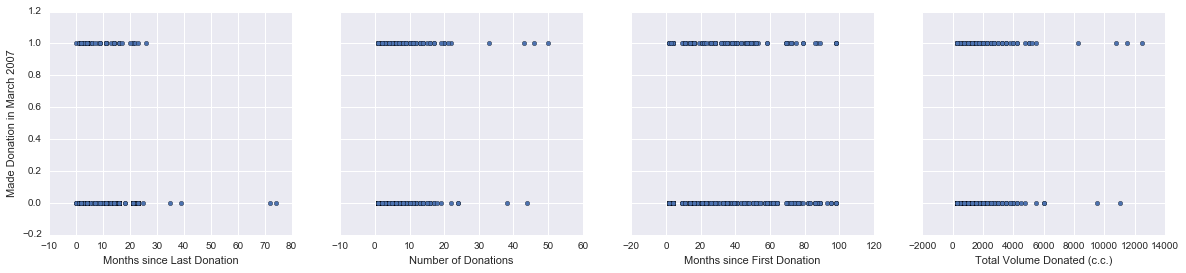

In [38]:
# 3 subplots that share the y axis
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(20, 4))
# axs is an array holding the different subplots

df.plot(kind='scatter', x='Months since Last Donation', y='Made Donation in March 2007', ax=axs[0])
df.plot(kind='scatter', x='Number of Donations', y='Made Donation in March 2007', ax=axs[1])
df.plot(kind='scatter', x='Months since First Donation', y='Made Donation in March 2007', ax=axs[2])
df.plot(kind='scatter', x='Total Volume Donated (c.c.)', y='Made Donation in March 2007', ax=axs[3])

In [39]:
lm = smf.OLS(y, x).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Made Donation in March 2007   R-squared:                       0.227
Model:                                     OLS   Adj. R-squared:                  0.223
Method:                          Least Squares   F-statistic:                     56.11
Date:                         Thu, 21 Jul 2016   Prob (F-statistic):           8.23e-32
Time:                                 20:26:47   Log-Likelihood:                -331.62
No. Observations:                          576   AIC:                             669.2
Df Residuals:                              573   BIC:                             682.3
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0010      0.002      0.478      0.633        -0.003     0.005
x2          4.879e-07   6.69e-08      7.294      0.000      3.57e-07  6.19e-07
x3            -0.0004      0.001     -0.395      0.693        -0.002     0.002
x4             0.0001   1.67e-05      7.294      0.000      8.91e-05     0.000
==============================================================================
Omnibus:                       67.201   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.134
Skew:                           0.969   Prob(JB):                     2.68e-20
Kurtosis:                       2.948   Cond. No.                     4.62e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.05e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<h3>Eigen Values</h3>

<p>Values close to 0 indicate there is a correlation between variables. </n>
Number of Donations is closely correlated to Total Volume Donated as the Eigen value is only .0812</p>

In [40]:
w, v = np.linalg.eig(corrMatrix)
w

array([  2.58136179e+00,   1.33031241e+00,   9.92967771e-01,
         3.56843376e-01,   7.38514648e-01,   4.90918402e-16])

In [41]:
v[:,2]

array([-0.99237358, -0.02088229,  0.08126084,  0.08126084, -0.02552887,
       -0.03000396])

In [42]:
df = df.drop('Total Volume Donated (c.c.)', axis=1)

In [43]:
linearModel = linear_model.Ridge()
linearModel.fit(x_train, y_train)
y_hat = linearModel.predict(x_test)
score = mean_squared_error(y_test, y_hat)

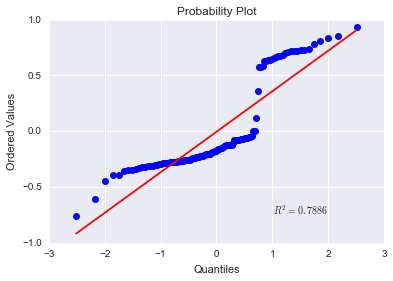

In [44]:
import pylab
import scipy.stats as stats

(a, r) = stats.probplot(y_test-y_hat, dist="norm", plot=pylab)
pylab.show()

<h3>Model Analysis</h3>

In [45]:
print ("Score: %s" % score)
print (linearModel.coef_)

Score: 0.160965420357
[ -7.74766377e-03   4.02361180e-07  -2.99973893e-03   1.00590123e-04]


<h4>Null Hypothesis</h4>
<p>The null hypothesis is that none of the x value fields have an impact on the likelihood of someone donating blood.</p>

<h4>Alternative Hypothesis</h4>
<p>The alternative hypothesis is that the x value does have an impact on the likelihood of someone donating blood.</p>

<h4>Coefficients</h4>
<p>The Months since Last Donation field has the largest weighting of the coefficients. The value is negatively correlated to the likelihood that someone will donate blood. In the correlation matrix it had an inverse but similar correlation weighting to Number of Donations and Total Volume Donated. However, there is some multicollinearity in these variables as Number of Donations is directly correlated with the Total Volume Donated.</p>

<h4>Linear Model</h4>
<p>It does not look like a linear model is a good fit for the predictor model of this data. Instead a binary classification model should be used.</p>

<h3>Classification Model</h3>

In [62]:
modelDict = {}
bestModel = 2
for i in range(2, 20):
    kNeighborsModel = neighbors.KNeighborsClassifier(i)
    kNeighborsModel.fit(x_train, y_train)
    y_hatNeighbors = kNeighborsModel.predict(x_test)
    scoreKNeighbor = mean_squared_error(y_test, y_hatNeighbors)
    tempDict = {}
    tempDict['model'] = kNeighborsModel
    tempDict['score'] = scoreKNeighbor
    modelDict[i] = tempDict
    if scoreKNeighbor > modelDict[bestModel]['score']: bestModel = i
        
print (bestModel)
modelDict[bestModel]['score']

7


0.28448275862068967

<p>The classification model was able to score .25 about .09 better than the linear model</p>

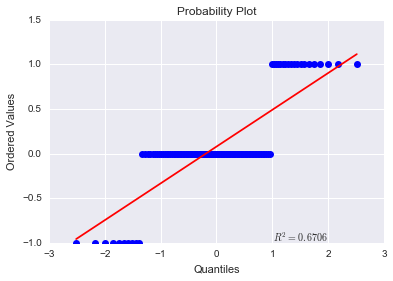

In [47]:
(a, r) = stats.probplot(y_test-y_hatNeighbors, dist="norm", plot=pylab)
pylab.show()

<h3>Logistic Regression</h3>

In [48]:
lr = LogisticRegression()

parameters = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']}
clf = GridSearchCV(lr, parameters, cv=5)

clf.fit(x_train, y_train)
best_clf = clf.best_estimator_
y_hat_grid = best_clf.predict(x_test)

/Users/adeangelis2/anaconda/envs/gads/lib/python3.5/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/adeangelis2/anaconda/envs/gads/lib/python3.5/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/adeangelis2/anaconda/envs/gads/lib/python3.5/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/adeangelis2/anaconda/envs/gads/lib/python3.5/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/adeangelis2/anaconda/envs/gads/lib/python3.5/site-pac

In [49]:
scoreGridNeighbor = mean_squared_error(y_test, y_hat_grid)
scoreGridNeighbor

0.25

<p>The logistic regression performed no better than the classification model</p>